<center> <h2> DS 3000 - Spring 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Lazer Translation</h3> </center>
<center><h4>Srinath, Zumaad, Tushar, Eric</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Dropbox links for required assets:
https://www.dropbox.com/sh/hoixtm3q2ckzt71/AAB4EwdA0wU-ZyWZcd9YUDt8a?dl=0

Our project was concerned with converting a video of someone drawing on a surface with a laser into a digit. To do this we had to convert a video into a representation of a digit that our model could understand. This involved splitting the video into frames/pixel arrays and creating an algorithm to create a composite pixel array which represented all the points the laser was at during the video.

This composite pixel array was then passed to the model for prediction to get a digit. Our model was trained using KNN on a training set with around 30k images of digits and performed with 96.51% accuracy on the testing set.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

We want to create a proof of concept project that would allow us to convert laser drawn writing into digit representations. Through the completion of this endeavour we would have gained an in-depth exposure to python ski-kit lean’s utilities, have a greater understanding of using data sets to train models to recognize patterns such as handwriting, and achieve a comprehensive understanding of other python libraries such as image processing and pixel analysis. 

### Significance of the Problem
Why is it important to tackle this problem in your project?
In what ways could the insights from this project be useful?
Has there been previous work on your topic? Do some research into your topic. Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).
This project serves as a proof of concept regarding the futuristic ability of medium translation from lasers to understandable text. Having a constant stream of data being read from a laser pointer and translated onto a screen not only greatly studies data science, machine learning, and image processing libraries, but will create an incredibly interesting project that can be constantly tweaked and improved. For example, one can extend the laser translation functionality to incorporate deciphering more than just digits - including symbols, shapes, and letters - and potentially bring light to a unique form of discrete communication. 
There has been no recorded research on our particular laser to text proposal. However, digit recognition is an incredibly widely researched subject, and one that many continue to discover new applications for [1]. We believe that our project signifies the creation of just one more of these useful applications.
1. Team, D. F. (2020, January 7). Deep Learning Project - Handwritten Digit Recognition using
Python. Retrieved from 
https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition

### Questions/Hypothesis


Given the aforementioned problem and its importance, we set out to tackle the following questions:  

Q1: Is the accuracy of our tests dependent on the robustness of our image stitching code or rather the model?  

Q2: Will the speed of our laser drawn digit result in greater inaccuracy of digit prediction? (Requirement 2: variable question)  

Q3: Due to the incredible size of the data set, what is the optimal algorithm and what are the most effective parameters for this algorithm, e.g., choosing the number of iterations, error tolerance, etc.?  


We believe that the accuracy will be dependent on the color of laser used and the color of the background wall as well - making these decisions integral in guaranteeing success. In order to prove this, we will run our program through different wall backgrounds and analyze the implications of each.  

Our hypothesis is that the accuracy of our tests will be fully determined by how robust our image stitching (i.e. the process that takes the parsed video images and re-constitutes a composite image by analyzing the points in each image with the greatest color contrast) code proves to be - as opposed to it being an issue on the model’s side. Our workflow will be to capture a video of someone outlining a digit with a laser pointer, splitting this video into various images each with their own laser location, stitching all of these images back together to form a singular number made up of various laser point locations, feeding this data into our digit-recognizer model, and finally printing this number.  Thus, our hypothesis is that the accuracy of this methodology will ultimately define the accuracy of our model and code as a whole.    

Furthermore, we believe that the speed of the drawing will be a determining factor regarding the ultimate prediction accuracy of the drawn digit. Since we will be parsing the video drawing by frames, it would make sense that writer slower equates more accurate results.  

Since numbers have a high variance we have a very large dataset, we hypothesis that the KNN algorithm will provide the most optimal results. Furthermore, the large number of features usually bogs down many accuracy algorithms and and makes training time unfeasibly long. This is the case with LinearSVC and not the case with KNN, so we have further reason to believe that KNN will be an optimal algorithm choice.



…..

*Side note regarding question requirements - Our feature variables are 784 pixels, and in of themselves, they don’t have any particular meaning. For example, in a heart disease prediction machine project - one could draw hypotheses based on a single variable (e.g. body-fat percentage) and what they believe its impact will be on the result. For our case, variable-based questions will have to reference outside factors such as speed of drawing, color of background, etc, since a single pixel density does not provide insight in of itself.  


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Training data: kaggle.com/c/digit-recognizer/download/G4erCQmLsLsmveFfJfNg%2Fversions%2FFy8gTgxUjCWjkk6UfEsa%2Ffiles%2Ftrain.csv  

Testing data: kaggle.com/c/digit-recognizer/download/G4erCQmLsLsmveFfJfNg%2Fversions%2FFy8gTgxUjCWjkk6UfEsa%2Ffiles%2Ftest.csv  

The dataset contains 28,000 digit image representations ranging from 1 through 9 - each represented through a collection of 784 pixel values labeled pixel0, pixel1..pixel783. Each pixel variable provides a grayscale value (ranging from 0 to 255) that makes up the image. By taking one of these 784 long pixel series, reshaping it into a 28x28 image, and plotting the data through pyplot, the image representation of the digit is created. 



### 2.2. Variables
* For your hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?

**Independant variables**: Speed of the drawing, color of the laser, and the color of the wall.  
**Dependant variables**: Accuracy of the prediction.

**Features**: 784 pixels which have values ranging from 0-255 inclusive, where 255 is black and 0 is white.  
**Target variables**: The digit (1-9).

### 2.3. Data Analysis
Our target variable is the digit that the pixel array represents and it's value is based on the 784 feature variables.

This is a supervised learning problem as our model was trained on labeled data (digits each corresponding to a 784 pixel values). The learning task was classification as it is predicting between a set number of target classes and not an infinite number as is done during regression tasks.

We are going to use KNN, as its a high variance classifer and works best with larger datasets andafter testing the accuracies KNN had the highest accuracy. Furthermore, since we have a lot of features, other classification algorithms like linear SVC take too long to train relative to KNN.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
When training the model, we already had well formed data in a csv format that we could just read into a dataframe and train and test the model on. However, using the model with the rest of our workflow, we had to ultimately convert a video to a dataframe with 784 columns with each number in the column ranging from 0-255 where 255 is darkest and 0 is lightest, as that was the type of input the model needed. Doing this required extensive data wrangling.  

To start off, we have a video of us drawing with a laser. We want to convert this to what represents an image of a digit. First, we have to split the video into frames and convert all of them into one image. Each frame shows the laser’s dot on the wall at a given time. So, to get the image of the digit we have to essentially overlay the laser point in each frame onto the final composite frame. To do this, we resize each frame so thats its 28 * 28 pixels (this is 784 pixels in totals like how the model expects). 
Then we get the pixel array of the image (a list of 784 items that range from 0-1, where 1 is darkest and 0 is lightest). To figure out the location of the laser point in that frame, we have a threshold: A green laser typically has a brightness less than .15, so we gather the locations of the pixels that are below that threshold and return them. These locations will be marked on the final composite pixel array as 255 (darkest) to mark where the laser’s point was.  

After this process is done on every frame, the final composite pixel array has values 255 for every location the laser was, and 0 for all the other values. This array represents the digit. Finally, we convert it into a dataframe and pass it the model for prediction.  




** Pre-processing of Video to Composite Pixel Image Code**

In [42]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


class PixelExtractor:
    def __init__(self, image_path, color = 'g'):
        """Image represents file path to target file """
        self.image_path = image_path
        self.color = color
        
        
    def imageprepare(self, argv):
        """
        This function returns the pixel values as one array with 784 pixel values normalized
        so that 255 is 1 and 0 is 0.
        """
         
        im = Image.open(argv).convert('L')
        img = im.resize((28, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        tv = list(img.getdata()) 
      
        # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
        tva = [(255 - x) * 1.0 / 255.0 for x in tv]
        return tva

    def reshape_pixel_array(self, pixel_arr):
        """ Takes flat array of 784 values and turns it into a 2d array with 28 rows of size 28 """
        reshaped_pixel_arr = []
        n = 28
        while n <= len(pixel_arr):
            reshaped_pixel_arr.append(pixel_arr[n-28:n])
            n+=28

        return reshaped_pixel_arr
    
    def extract_target_pixel_location(self):
        """ Returns list of target pixel locations """
        #Respective Image location
        pixel_array = self.imageprepare(self.image_path)

        #Select less_than_target color point --> must be calibrated
        #?? Should we use an abstract class here instead of an if statment ??
        if self.color == "g":
            less_than_target = .15
        else:
            raise ValueError("Unknown color value")

        #Chooses target pixels as well as it's location
        target_pixels = []
        for pixel in enumerate(pixel_array):
            if pixel[1] < less_than_target:
                target_pixels.append(pixel[0])

        return target_pixels
    
    def draw_image(self):
        """ Draws the image representation of the rgb pixel valued image """
      
        pixel_array = self.imageprepare(self.image_path)
        newArr = self.reshape_pixel_array(pixel_array)
        plt.imshow(newArr, interpolation='nearest')
        plt.savefig('MNIST_IMAGE.png')#save MNIST image
        plt.show()#Show / plot that image

In [43]:
import os
from matplotlib import pyplot as plt


class ImageStitcher:
    def __init__(self, directory_path = 'data'):
        """ Directory Path represents directory containing spliced images """

        self.directory_path = directory_path
        
    def create_composite_image_list (self):
        """ 
        Takes a directory and overlays its content images together based on 
        PixelExtractor's conditions

        """

        directory = os.fsencode(self.directory_path)
        #255 represents a black cell
        #0 represents a white cell
        composite_image_list = [0 for i in range(784)]

        for file in os.listdir(directory):
            filename = os.fsdecode(file)

            #creates pixel_extractor instance
            pixel_extractor = PixelExtractor(self.directory_path + '/' + filename, 'g')
            target_pixel_locations = pixel_extractor.extract_target_pixel_location()
            for loc in target_pixel_locations:
                composite_image_list[loc] = 255

        return composite_image_list
    
    def draw_image(self):
        """Draws the image representation of the composite image"""

        composite_image_list = self.create_composite_image_list()

        reshaped_composite_image = self.reshape_pixel_array(composite_image_list)

        plt.imshow(reshaped_composite_image, cmap='Greys',  interpolation='nearest')
        # plt.savefig('MNIST_IMAGE.png')#save MNIST image
        plt.show()#Show / plot that image
        return composite_image_list
    
    def reshape_pixel_array(self, composite_image_list):
        """ Takes flat array of 784 values and turns it into a 2d array with 28 rows of size 28 """
        reshaped_composite_image = []
        n = 28
        while n <= len(composite_image_list):
            reshaped_composite_image.append(composite_image_list[n-28:n])
            n+=28

        return reshaped_composite_image



In [44]:
import cv2
import os
import shutil


class VideoToImageConverter:
    """
    This class is responsible for converting a video to frames and saving it
    to a specified directory.
    """

    def __init__(self, video_path):
        self.video_path = video_path

    def splice_video(self, destination_path = 'data'):
        """ 
        Splices given video to individual images and 
        writes them to a folder specified by destination_path

        *Don't name your destination path a folder that is important,
        since this folder will be deleted and populated with images
        """

        # Playing video from file:
        vidcap = cv2.VideoCapture(self.video_path)

        #Saves to respective folder
        try:
            if os.path.exists(destination_path):
                #Deletes any folder currently named ./data if it exists
                shutil.rmtree(destination_path, ignore_errors=True)
                print("Deleting current '" + destination_path + "' folder" )


            print("Creating new '" + destination_path + "' folder" )
            os.makedirs(destination_path)

        except OSError:
            print ('Error: Cannot create directory')

        frame_count = 0
        print("processing frames, this takes around 10 seconds")
        while(True):
            # Capture frame-by-frame

            hasFrames,image = vidcap.read()

            if hasFrames:

                # Saves image of the current frame in jpg file
                name = './'+ destination_path +'/frame' + str(frame_count) + '.jpg'
                cv2.imwrite(name, image)
                frame_count += 1

            else:
                print("done processing frames")
                break

        # When everything done, release the capture
        vidcap.release()
        cv2.destroyAllWindows()

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


In [62]:
### 3.3. Model Construction and training

import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import joblib

In [63]:
#read in data
data = pd.read_csv("https://raw.githubusercontent.com/tdesai2017/Laser_Translation/master/final/train.csv")

In [64]:

features  = data.drop("label", axis = 1)
target = data["label"]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

print("creating models")

k1 = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

k2 = KNeighborsClassifier(n_neighbors = 4)

knn = KNeighborsClassifier(n_neighbors = 6)

decision_tree = DecisionTreeClassifier(max_depth = 10)

gnb = GaussianNB()

SGDModel = SGDClassifier()


print("training all the models")

print("fitting k1")
k1.fit(X=X_train, y=y_train)
print("successfully fit k1\n")

print("fitting k2")
k2.fit(X=X_train, y=y_train)
print("successfully fit k2\n")

print("fitting KNeighborsClassifier")
knn.fit(X=X_train, y=y_train)
print("Successfully fit KNeighborsClassifier\n")

print("fitting DecisionTreeClassifier") 
decision_tree.fit(X=X_train, y=y_train)
print("succesfully fit DecisionTreeClassifier\n")

print("fitting GuassianNB")
gnb.fit(X=X_train, y=y_train)
print("Successfully fit GaussianNB\n")

print("fitting SGD")
SGDModel.fit(X=X_train, y=y_train)
print("Successfully fit SGD classifier")

creating models
training all the models
fitting k1
successfully fit k1

fitting k2
successfully fit k2

fitting KNeighborsClassifier
Successfully fit KNeighborsClassifier

fitting DecisionTreeClassifier
succesfully fit DecisionTreeClassifier

fitting GuassianNB
Successfully fit GaussianNB

fitting SGD


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Successfully fit SGD classifier


In [ ]:
### 3.4. Model Evaluation
print("calculating accuracies:\n")

print("Prediction accuracy on the training data with DecisionTreeClassifier :", format(decision_tree.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with DecisionTreeClassifier :", format(decision_tree.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with GaussianNB :", format(gnb.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with GaussianNB :", format(gnb.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with k1 :", format(knn.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with k1 :", format(knn.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with SGDClassifier :", format(SGDModel.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with SGDClassifier :", format(SGDModel.score(X_test, y_test)*100, ".2f"))

calculating accuracies:

Prediction accuracy on the training data with DecisionTreeClassifier : 90.80
Prediction accuracy on the test data with DecisionTreeClassifier : 84.12

Prediction accuracy on the training data with GaussianNB : 56.23
Prediction accuracy on the test data with GaussianNB : 55.26



In [ ]:
### 3.5. Model Optimization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsClassifier()

knn.fit(X=X_train, y=y_train)

param_grid = {"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "metric": ["euclidean", "manhattan", "minkowski"]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X=X_train, y=y_train)

print("Best parameters: ", grid_search.best_params_)
print("Training set score with best parameters: ", grid_search.score(X_train, y_train))
print("Test set score with best parameters: ", grid_search.score(X_test, y_test))



In [ ]:
### 3.6. Model Testing

#testing the knn model that we optimized (k1) against the ones we didn't (k2 and knn)

print("Prediction accuracy on the training data with k1 :", format(k1.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with k1 :", format(k1.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with k2 :", format(k2.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with k2 :", format(k2.score(X_test, y_test)*100, ".2f"))
print("")

print("Prediction accuracy on the training data with KNeighborsClassifier :", format(knn.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data with KNeighborsClassifier :", format(knn.score(X_test, y_test)*100, ".2f"))
print("")

## 4. Final Runthrough of Code - Final Script

*Remember, everything is path specific. 

**1. The loaded model can be downloaded from , and should be linked in joblib.load(...)  
**2. The test videos are labeled (...) and can be downloaded at ___. Please input the path of the video into the Video To ImageConverter

In [34]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

In [35]:
#load the model from the file with all the model properties

#you can download this from the dropbox link we provided, or you can train the models above and use them.
loaded_model = joblib.load("k1_model.sav")

/usr/local/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.21.3 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [45]:
#convert video to frames to be analyzed to create the composite image
vti_converter = VideoToImageConverter('vid.mp4')
vti_converter.splice_video('data')

Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


In [46]:
#create object which is used to stitch individual frames into the composite image
image_stitcher = ImageStitcher()

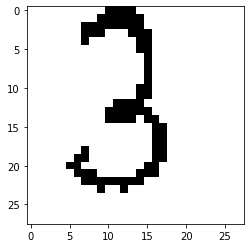

In [47]:
#drawing the image takes around 5 seconds
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

In [40]:
print(loaded_model.predict(pixel_dataframe))

[3]


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 5. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model

We read out data from a csv and split it into training and testing data. We constructed four different classification models (SGD, Decision tree, GNB, and KNN) and evaluated their performance. KNN performed the best so we decided to optimize it further. 

To optimize KNN we ran GridSearch on it and figured out the best parameters where a neighbor count of 3 and a metric of euclidean. The GridSearch optimized KNN had 96.51% accuracy on test data and 98.28% accuracy on training data. Prior to GridSearch, it had 97.41% accuracy on training data, and 96.51% accuracy on test data.


* Intepret your findings from 3.4., 3.5, and 3.6

We compared KNN, GNB, Decision tree, and SGD. KNN had the best performance and improved slightly after applying grid search to it. We should use KNN as it has the best accuracy and that is what we decided to go with.
    
    
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?

We had several hypothesis.

We thought that the speed of the laser drawing was a crucial factor. This was true as shown by the lack luster interpretation of a hastily drawn number:


In [48]:
vti_converter = VideoToImageConverter('fast3.mp4')
vti_converter.splice_video('data')
image_stitcher = ImageStitcher()

Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


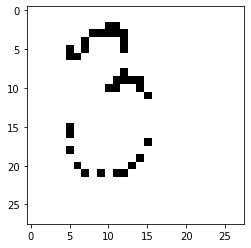

In [12]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

In [13]:
print(loaded_model.predict(pixel_dataframe))

[1]


As you can see drawing fast causes really poor quality images. Here is another test:

In [49]:
vti_converter = VideoToImageConverter('anotherfast3.mp4')
vti_converter.splice_video('data')
image_stitcher = ImageStitcher()

Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


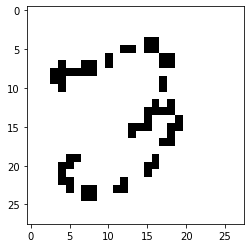

In [50]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

In second test, yet another poor quality image was produced. Here is the model's prediction based on the iamge above:

In [51]:
print(loaded_model.predict(pixel_dataframe))

[1]


Second hypothesis:
We thought the color of the wall and the laser would impact the accuracy. This was correct, but it is nuanced in that darker backgrounds work better due to our algorithm looking for pixels with a darkness lower than a certain treshold. Hence, with darker backgrounds there are less false positives as the only pixels with a higher brightness/lower darkness are the ones with the laser dot on them. This is demonstrated below:

In [52]:
#on a red (darker) background
vti_converter = VideoToImageConverter('redbackground3.mp4')
vti_converter.splice_video('data')
image_stitcher = ImageStitcher()

Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


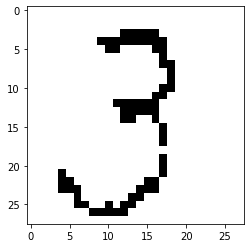

In [25]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

This still works correctly as the background is darker than the laser and only the laser's locations
are bright enough to make the threshold.

In [53]:
#on a brighter background
vti_converter = VideoToImageConverter('lightbackground3.mp4')
vti_converter.splice_video('data')
image_stitcher = ImageStitcher()


Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


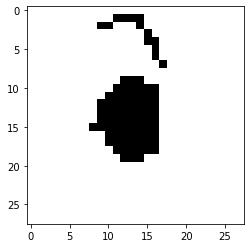

In [54]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

This messes up as the background is lighter than the laser in certain spots (the middle) and as such the algorithm sees that those pixels are bright enough to be considered the laser point and marks them.

In [55]:
#this is a test on a non uniform background
vti_converter = VideoToImageConverter('weirdbackground3.mp4')
vti_converter.splice_video('data')
image_stitcher = ImageStitcher()

Deleting current 'data' folder
Creating new 'data' folder
processing frames, this takes around 10 seconds
done processing frames


In [ ]:
pixel_array = image_stitcher.draw_image()
pixel_dataframe = pd.DataFrame([pixel_array])

The other Hypothesis was that KNN will be the best classification algorithm to use and it was as demonstrated in the model evaluation and model testing section.

* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)
    
There are several ways we can take this project and improve on it in the future. Though the model's accuracy is really good on well formed digits, it doesn't perform nearly as well on the ragged digits that are produced through lazer drawing. Perhaps training the model on less well formed labelled digits will prove better for accuracy on the types of input we will realistically be giving it.

Another idea is feeding the model data in realtime as the frames come in, instead of needing a saved video first.


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
**Tushar**: Worked on the image processing pipeline/orchestration and image stitching.  
**Zumaad**: Worked on the image processing pipeline/orchestration and image stitching.  
**Srinath**: worked on model construction, evaluation and visualization.  
**Eric**: worked on the conversion from video into frames with variable frame speeds.  
